In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline
from datetime import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [103]:
df1= pd.read_csv("Downloads/all_currencies.csv")
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,12-11-2015,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,13-11-2015,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,14-11-2015,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,15-11-2015,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,16-11-2015,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


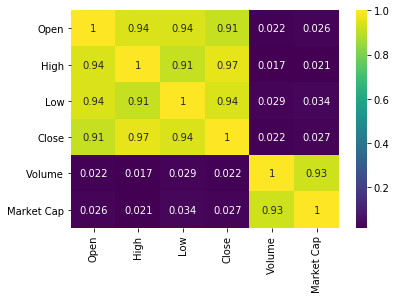

In [104]:
sns.heatmap(df1.corr(),cmap="viridis",annot=True)

In [105]:
df1.drop(['Open',"Low","High","Volume","Market Cap"],axis=1,inplace =True)

In [106]:
df1.head()

,Date,Symbol,Close
0,12-11-2015,$$$,0.000017
1,13-11-2015,$$$,0.000024
2,14-11-2015,$$$,0.000030
3,15-11-2015,$$$,0.000035
4,16-11-2015,$$$,0.000036


In [156]:
#for analysing only the bitcoin,bitcoin dataset is isolated
df=df1[df1["Symbol"]=="BTC"]

In [108]:
df["Date"] = df["Date"].apply(lambda x: dt.strptime(x,"%d-%m-%Y"))

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 88595 to 90573
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1979 non-null   datetime64[ns]
 1   Symbol  1979 non-null   object        
 2   Close   1979 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 61.8+ KB


In [110]:
df["day"] = df["Date"].apply(lambda x: x.day)
df["month"] = df["Date"].apply(lambda x: x.month)
df["year"] = df["Date"].apply(lambda x: x.year)
df["weekday"]=df["Date"].apply(lambda x: x.weekday())

In [111]:
df.head()

,Date,Symbol,Close,day,month,year,weekday
88595,2013-04-28,BTC,134.21,28,4,2013,6
88596,2013-04-29,BTC,144.54,29,4,2013,0
88597,2013-04-30,BTC,139.00,30,4,2013,1
88598,2013-05-01,BTC,116.99,1,5,2013,2
88599,2013-05-02,BTC,105.21,2,5,2013,3


Text(0, 0.5, 'Closing price')

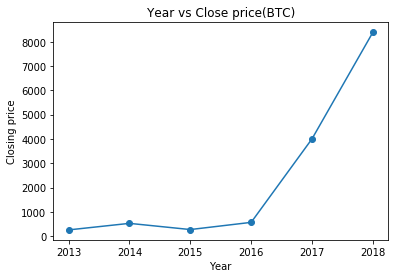

In [112]:
df.groupby('year').mean()["Close"].plot(marker="o")
plt.title("Year vs Close price(BTC)")
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

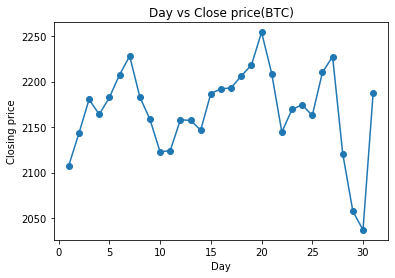

In [113]:
df.groupby('day').mean()["Close"].plot(marker="o")
plt.title("Day vs Close price(BTC)")
plt.xlabel("Day")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

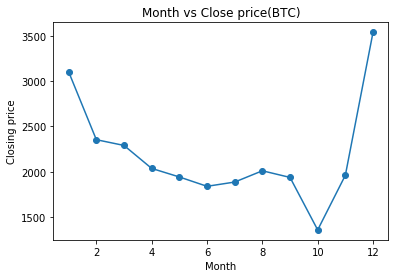

In [114]:
df.groupby("month").mean()["Close"].plot(marker="o")
plt.title("Month vs Close price(BTC)")
plt.xlabel("Month")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

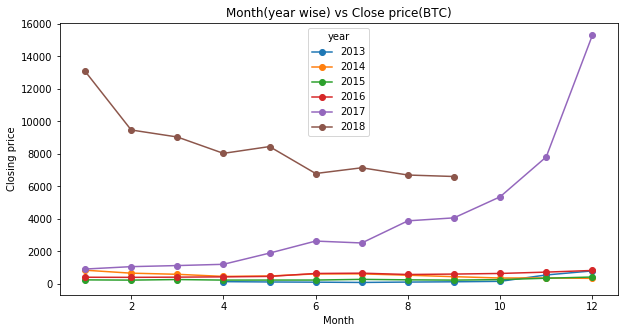

In [115]:
fig,ax = plt.subplots(figsize=(10,5))
df.groupby(["month",'year']).mean()["Close"].unstack().plot(marker="o",ax=ax)
plt.title("Month(year wise) vs Close price(BTC)")
plt.xlabel("Month")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

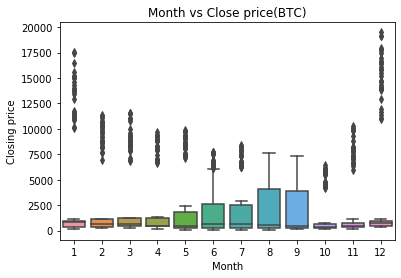

In [116]:
sns.boxplot(x="month",y="Close",data =df)
plt.title("Month vs Close price(BTC)")
plt.xlabel("Month")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

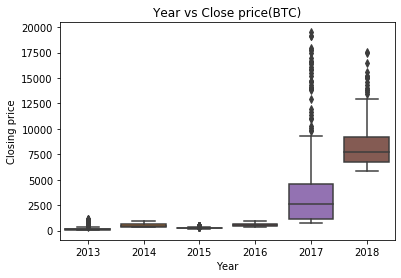

In [117]:
sns.boxplot(x="year",y="Close",data=df)
plt.title("Year vs Close price(BTC)")
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

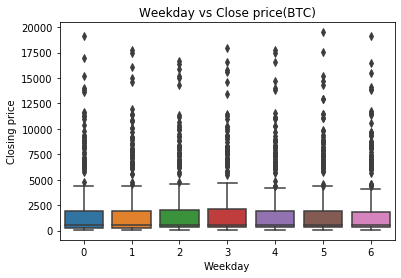

In [118]:
sns.boxplot(x="weekday",y="Close",data=df)
plt.title("Weekday vs Close price(BTC)")
plt.xlabel("Weekday")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

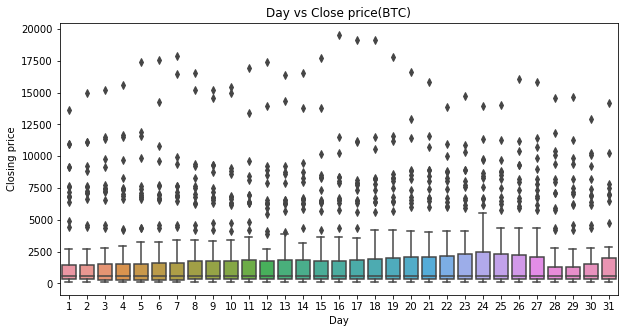

In [119]:
plt.figure(figsize=(10,5))
sns.boxplot(x="day",y="Close",data=df)
plt.title("Day vs Close price(BTC)")
plt.xlabel("Day")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

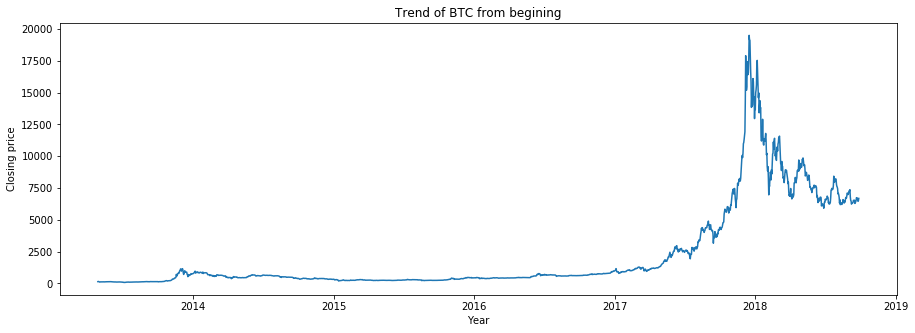

In [120]:
plt.figure(figsize=(15,5))
sns.lineplot(df["Date"],df['Close'])
plt.title("Trend of BTC from begining")
plt.xlabel("Year")
plt.ylabel("Closing price")

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [122]:
from statsmodels.tsa.stattools  import adfuller,kpss

In [123]:
#ADF Test
result = adfuller(df["Close"].values,autolag = "AIC")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.7739472727395198
p-value: 0.3934706878846468
Critial Values:
   1%, -3.4336993130292686
Critial Values:
   5%, -2.8630195274705996
Critial Values:
   10%, -2.5675576403215574


In [124]:
# KPSS Test
result = kpss(df["Close"].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 4.000690
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, '2nd Order Differencing')

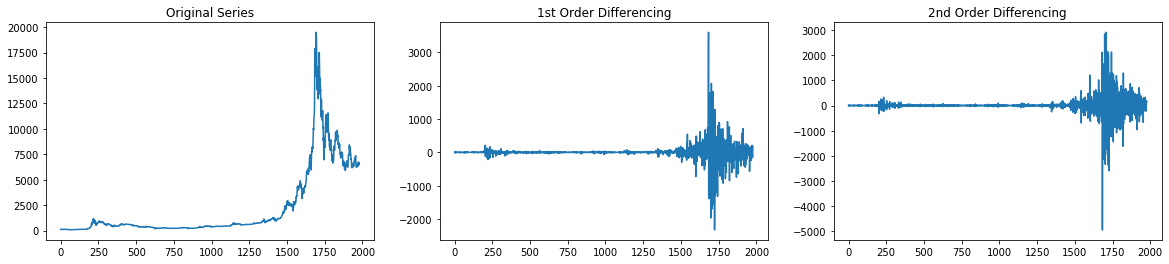

In [126]:
fig, axes = plt.subplots(1, 3, sharex=True,figsize=(20,4))
axes[0].plot(df["Close"].values); axes[0].set_title('Original Series')
axes[1].plot(np.diff(df["Close"].values)); axes[1].set_title('1st Order Differencing')
axes[2].plot(np.diff(np.diff(df['Close'].values))); axes[2].set_title('2nd Order Differencing')

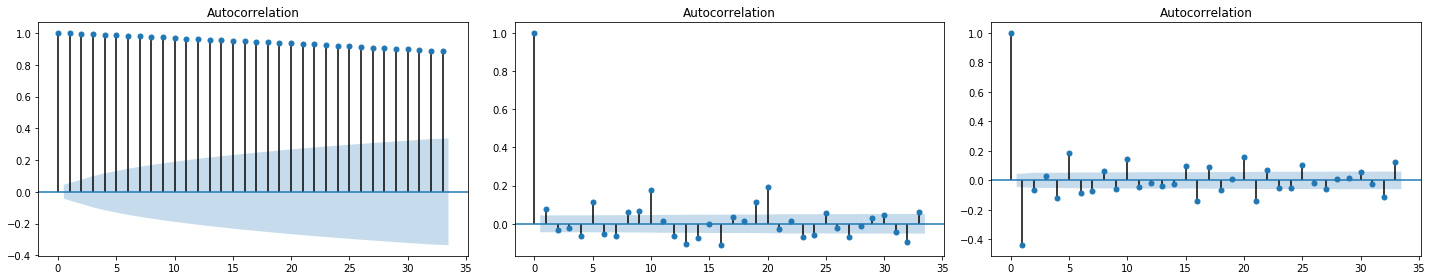

In [127]:
fig, axes = plt.subplots(1, 3, sharex=True,figsize=(20,4))
plot_acf(df["Close"].values, ax=axes[0])
plot_acf(np.diff(df['Close'].values), ax=axes[1])
plot_acf(np.diff(np.diff(df["Close"].values)), ax=axes[2])
plt.tight_layout()

In [128]:
from pmdarima.arima.utils import ndiffs
y=df["Close"].values
print(ndiffs(y,test="adf"))
print(ndiffs(y,test="kpss"))
print(ndiffs(y,test="pp"))

1
1
1


set d value to  1

In [129]:
from statsmodels.tsa.arima_model import ARIMA

In [130]:
# 0,1,0 ARIMA Model
model = ARIMA(df["Close"].values, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1978
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13623.715
Method:                           css   S.D. of innovations            237.148
Date:                Wed, 28 Oct 2020   AIC                          27251.430
Time:                        16:13:20   BIC                          27262.610
Sample:                             1   HQIC                         27255.537
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3077      5.332      0.620      0.535      -7.143      13.759


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1978
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13623.715
Method:                           css   S.D. of innovations            237.148
Date:                Wed, 28 Oct 2020   AIC                          27251.430
Time:                        16:21:43   BIC                          27262.610
Sample:                             1   HQIC                         27255.537
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3077      5.332      0.620      0.535      -7.143      13.759
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observat

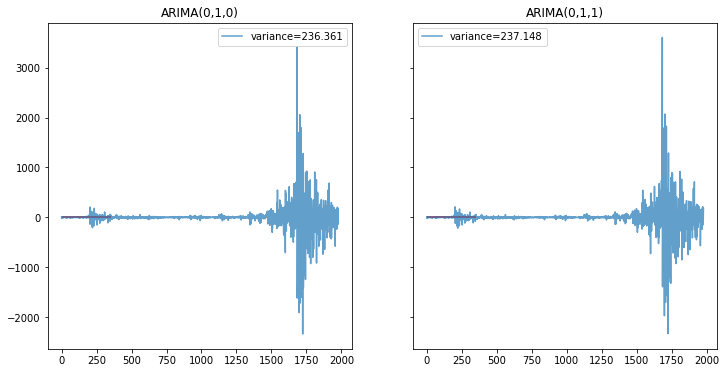

In [157]:
#determing q
model = ARIMA(df["Close"], (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(df["Close"], (0, 1, 1))
res_011 = model.fit()
print(res_011.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,1,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(0,1,1)");
ax[1].legend();

In [132]:
#akaike information criteria value of arima order (0,1,1) < aic value of arima order (1,1,0)
#so q=0
#therefore d=1,q=1

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1978
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -13617.145
Method:                       css-mle   S.D. of innovations            236.361
Date:                Wed, 28 Oct 2020   AIC                          27240.291
Time:                        16:13:26   BIC                          27257.060
Sample:                             1   HQIC                         27246.452
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3077      5.762      0.574      0.566      -7.986      14.601
ma.L1.D.Close     0.0842      0.023      3.644      0.000       0.039       0.130
                                    Root

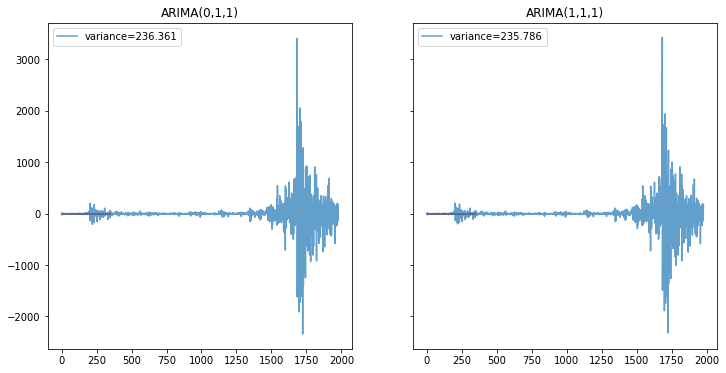

In [133]:
#determing q
model = ARIMA(df["Close"], (0, 1, 1))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(df["Close"], (1, 1, 1))
res_010 = model.fit()
print(res_010.summary())

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=350, color='r');
ax[0].set_title("ARIMA(0,1,1)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(1,1,1)");
ax[1].legend();

In [134]:
#akaike information criteria value of arima order (1,1,1) < aic value of arima order (0,1,1)
#so p=1
#therefore p=1,d=1,q=1

In [135]:
train=df["Close"][:-12]
test =df["Close"][-12:]

In [151]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1966
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13534.076
Method:                       css-mle   S.D. of innovations            236.305
Date:                Wed, 28 Oct 2020   AIC                          27076.153
Time:                        16:19:14   BIC                          27098.488
Sample:                             1   HQIC                         27084.361
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2599      5.588      0.583      0.560      -7.693      14.213
ar.L1.D.Close    -0.6591      0.083     -7.933      0.000      -0.822      -0.496
ma.L1.D.Close     0.7397      0.074     

In [152]:
# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



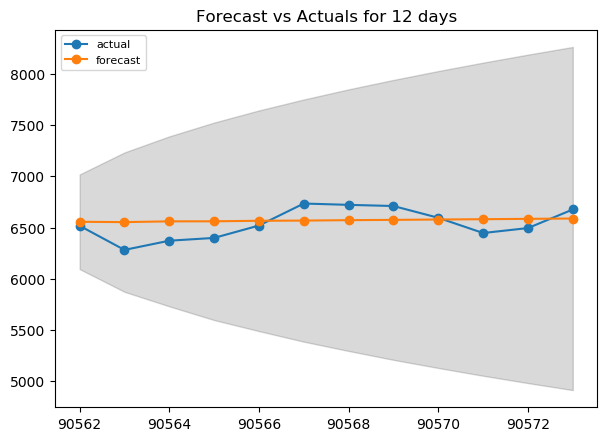

In [153]:
# Plot
plt.figure(figsize=(7,5), dpi=100)
#plt.plot(train[-100:], label='training')
plt.plot(test, label='actual',marker="o")
plt.plot(fc_series, label='forecast',marker='o')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals for 12 days')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [154]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'Mean Absolute percentage error':mape, 'mean of error':me, 'mean absolute error': mae, 
            'Mean percentage error': mpe, 'root mean square error':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [155]:
forecast_accuracy(fc, test.values)

{'Mean Absolute percentage error': 0.01911807452523096,
 'mean of error': 31.43973890627338,
 'mean absolute error': 124.33267929371588,
 'Mean percentage error': 0.0052782096995296806,
 'root mean square error': 142.29625342657297,
 'acf1': 0.5527836950261293,
 'corr': 0.5118439100106574,
 'minmax': 0.01878563039826142}